1. [Exemplos]
    1. [Quantidade de bebês ao longo do ano]
    2. [Quantidade de bebês fem e masc ao longo do ano]
    3. [Quantidade de bebês por dia da semana]
    4. [Quantidade de bebês fem e masc por mês]
    5. [Média peso dos bebês fem e masc]
    6. [Escolaridade mãe (ESCMAE) ]
    7. [Gestacão]


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()  
%matplotlib inline

In [2]:
df = pd.read_csv("SINASC_RO_2019.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc = df[['DTNASC', "SEXO", "PESO", "ESCMAE", "GESTACAO", "IDADEMAE", "APGAR5", "APGAR1"]]

In [5]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DTNASC    27028 non-null  object 
 1   SEXO      27024 non-null  object 
 2   PESO      27028 non-null  int64  
 3   ESCMAE    26716 non-null  object 
 4   GESTACAO  25796 non-null  object 
 5   IDADEMAE  27028 non-null  int64  
 6   APGAR5    26925 non-null  float64
 7   APGAR1    26932 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ MB


#### A) Quantidade de bebês ao longo do ano

Text(0, 0.5, 'Quantidade de nascimento')

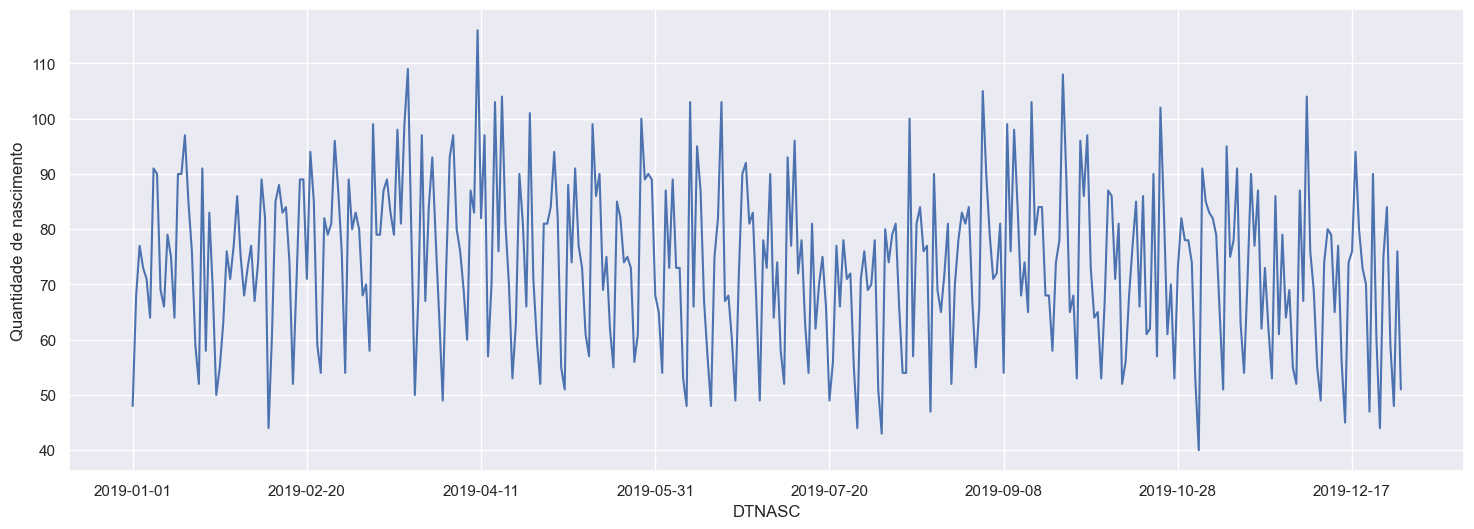

In [6]:
sinasc_dt = sinasc.groupby('DTNASC')["IDADEMAE"].count().plot(figsize=(18,6))
plt.ylabel("Quantidade de nascimento")

#### B) Quantidade de bebês fem e masc ao longo do ano

In [7]:
sinasc["SEXO"].value_counts()

SEXO
Masculino    13886
Feminino     13138
Name: count, dtype: int64

In [8]:
fem = sinasc[sinasc["SEXO"] == 'Feminino'].groupby("DTNASC")["IDADEMAE"].count()
masc = sinasc[sinasc["SEXO"] == "Masculino"].groupby("DTNASC")["IDADEMAE"].count()

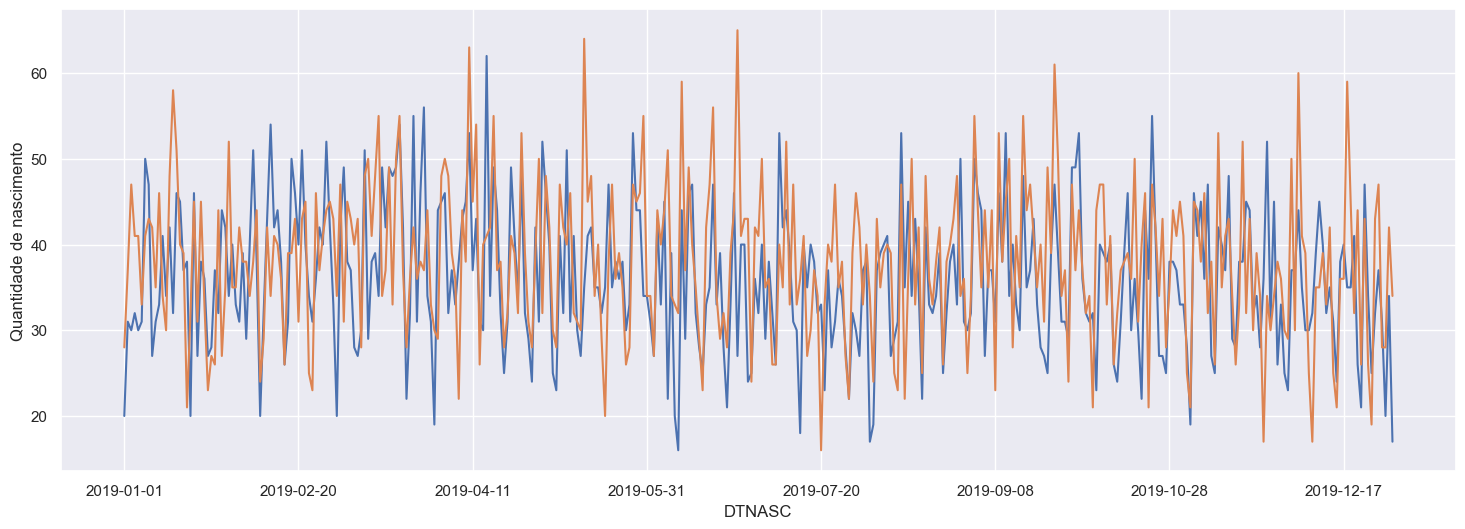

In [9]:
plt.close("all")
fig, axes = plt.subplots(figsize=(18,6))

fem.plot()
masc.plot()
plt.ylabel("Quantidade de nascimento");

#### C) Quantidade de bebês por dia da semana

In [10]:
sinasc.loc[:, "DTNASC"] = pd.to_datetime(sinasc["DTNASC"])

In [11]:
sinasc.set_index("DTNASC", inplace=True)

In [12]:
sinasc.head()

,SEXO,PESO,ESCMAE,GESTACAO,IDADEMAE,APGAR5,APGAR1
DTNASC,,,,,,,
2019-02-19,Masculino,3685,8 a 11 anos,37 a 41 semanas,19,10.0,9.0
2019-02-21,Feminino,3055,8 a 11 anos,37 a 41 semanas,29,9.0,8.0
2019-02-25,Feminino,3460,8 a 11 anos,37 a 41 semanas,37,10.0,8.0
2019-03-20,Feminino,2982,12 anos ou mais,37 a 41 semanas,30,10.0,9.0
2019-03-23,Feminino,3310,8 a 11 anos,37 a 41 semanas,30,10.0,8.0


In [13]:
#Monday=0, Sunday=6.
sinasc.loc[:, 'DIADASEMANA'] = sinasc.index.dayofweek

C:\Users\carlo\AppData\Local\Temp\ipykernel_14308\1128626994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc.loc[:, 'DIADASEMANA'] = sinasc.index.dayofweek


In [14]:
sinasc_sem = sinasc.groupby("DIADASEMANA")["IDADEMAE"].count()

Text(0.5, 1.0, 'Quantidade de Nascimento X Dia da Semana')

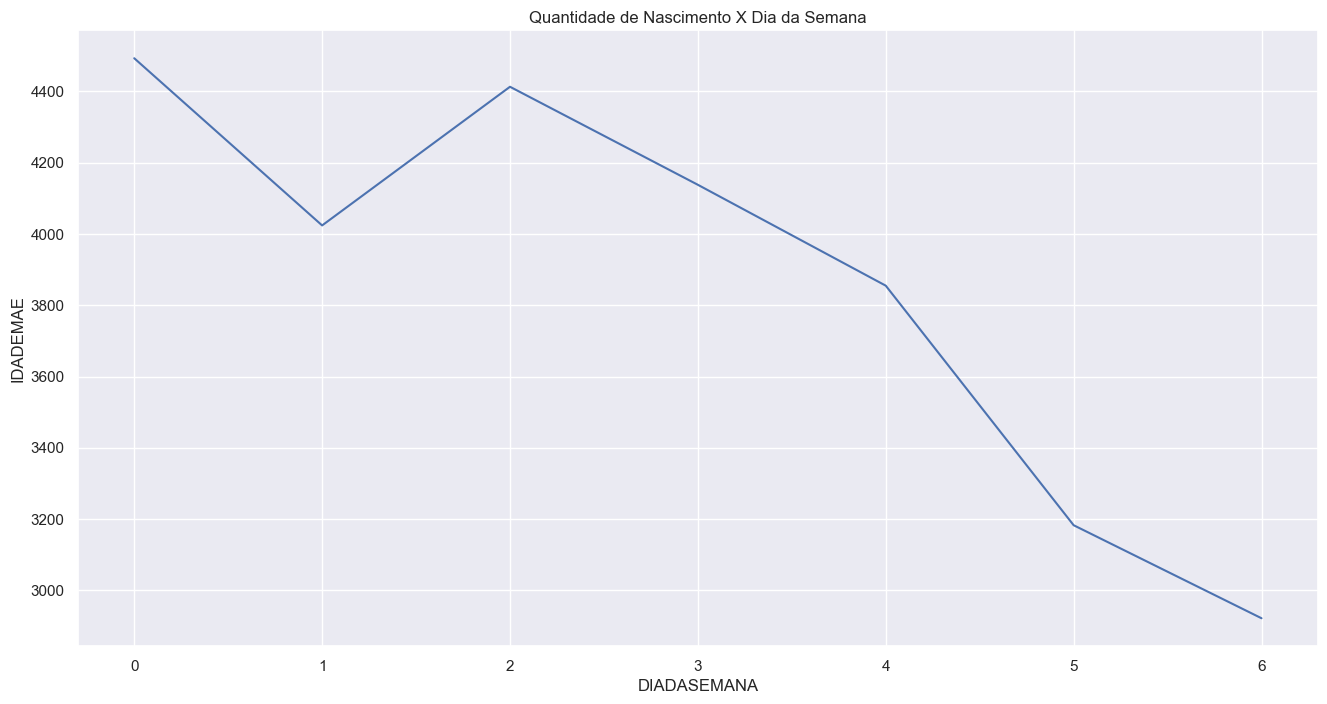

In [15]:
plt.close("all")
fig, axes = plt.subplots(figsize=(16,8))

sns.lineplot(data=sinasc_sem)
axes.set_title("Quantidade de Nascimento X Dia da Semana")

#### 4) Quantidade de bebês fem e masc por mês

<Axes: xlabel='DTNASC'>

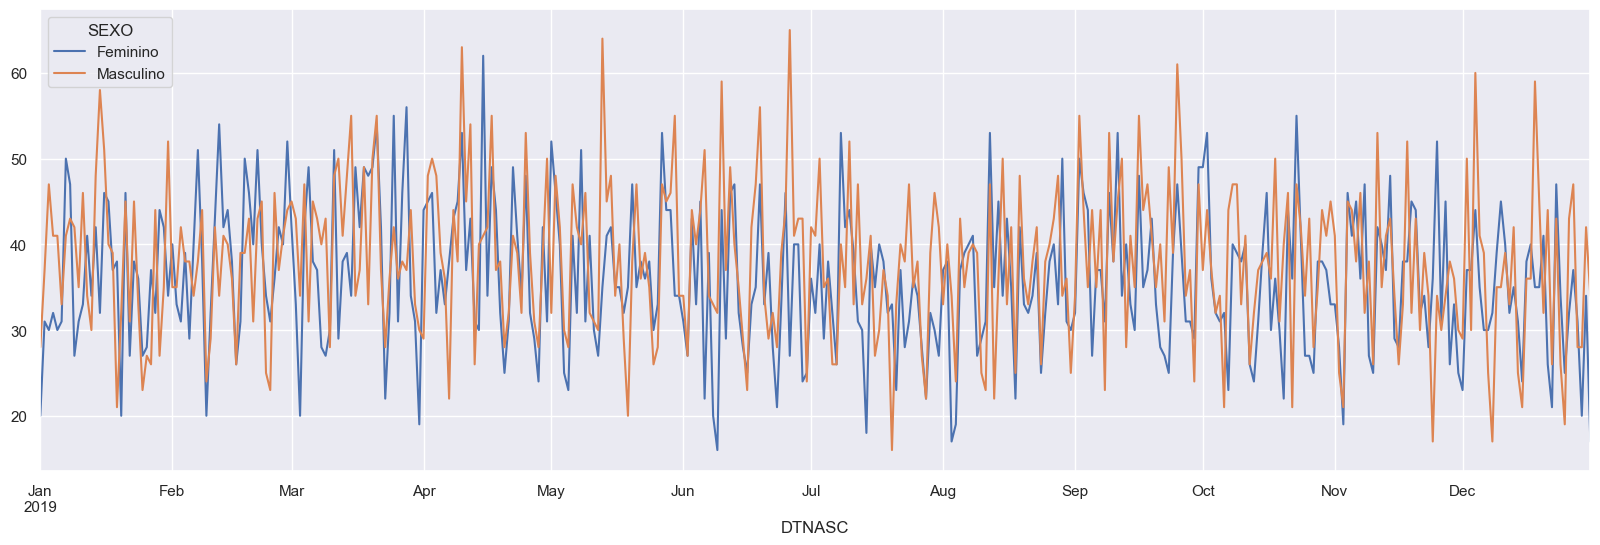

In [16]:
sinasc.groupby(["DTNASC", "SEXO"])["IDADEMAE"].count().unstack().plot(figsize=(20,6))

#### 5) Média peso dos bebês fem e masc

Text(0, 0.5, 'Peso')

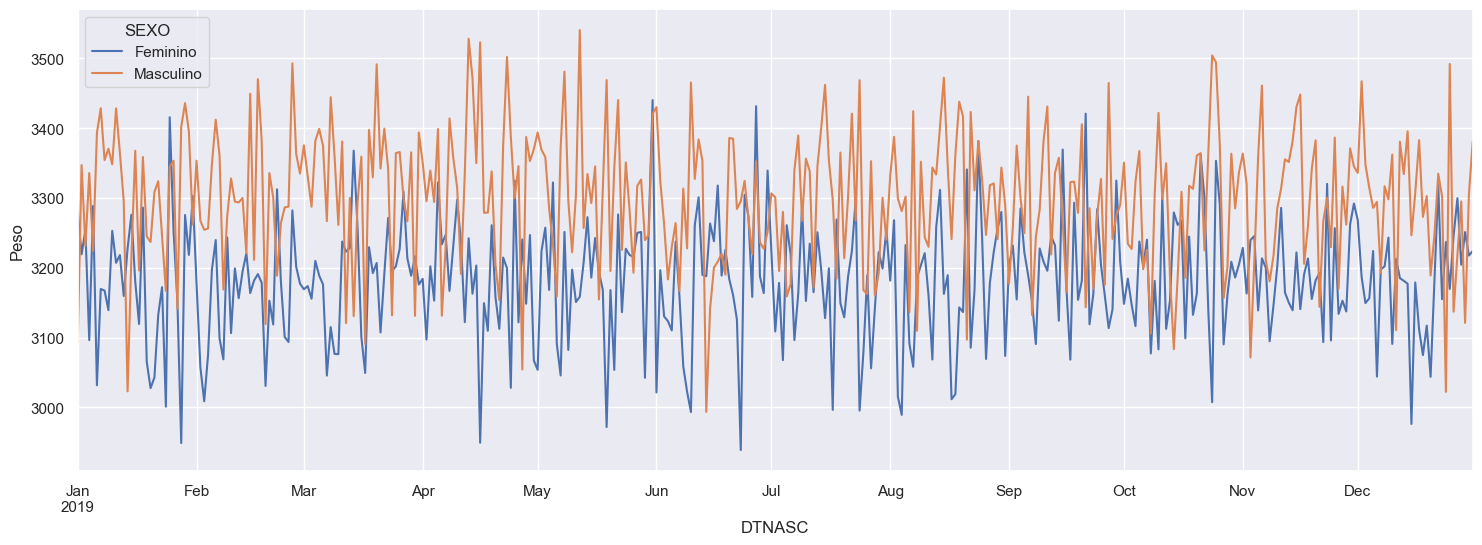

In [17]:
sinasc.groupby(["DTNASC", "SEXO"])["PESO"].mean().unstack().plot(figsize=(18,6))
plt.ylabel("Peso")

#### 6) Escolaridade mãe (ESCMAE)

<Axes: xlabel='ESCMAE'>

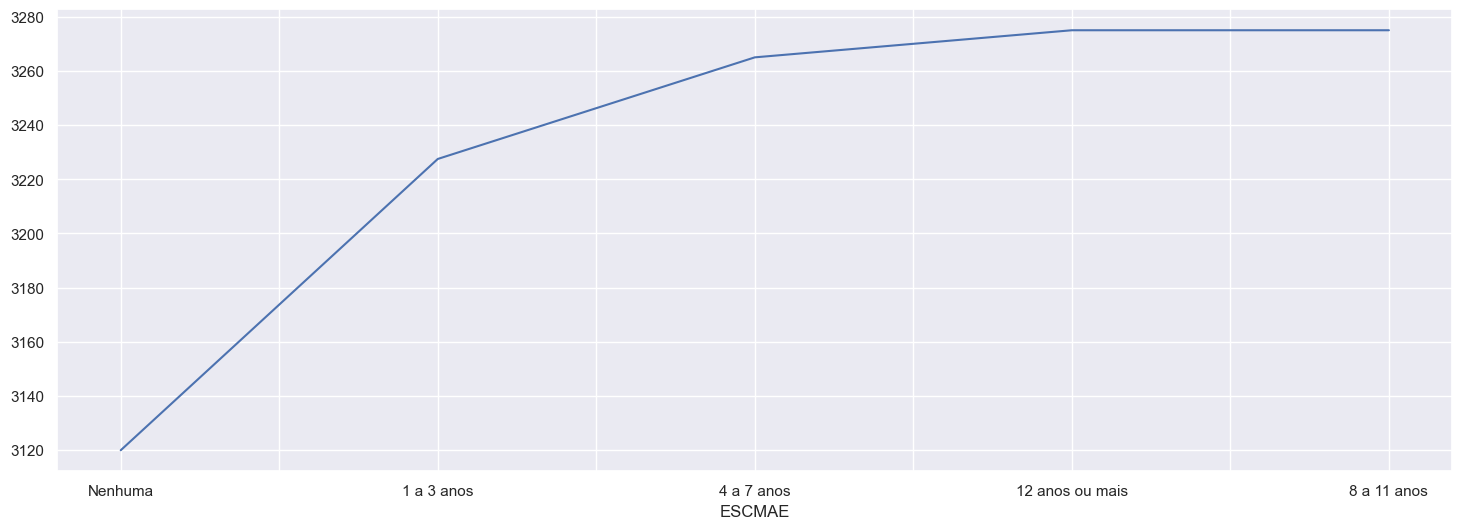

In [18]:
sinasc.groupby(["ESCMAE"])["PESO"].median().sort_values().plot(figsize=(18,6))

#### 7) Gestacão

<Axes: xlabel='GESTACAO'>

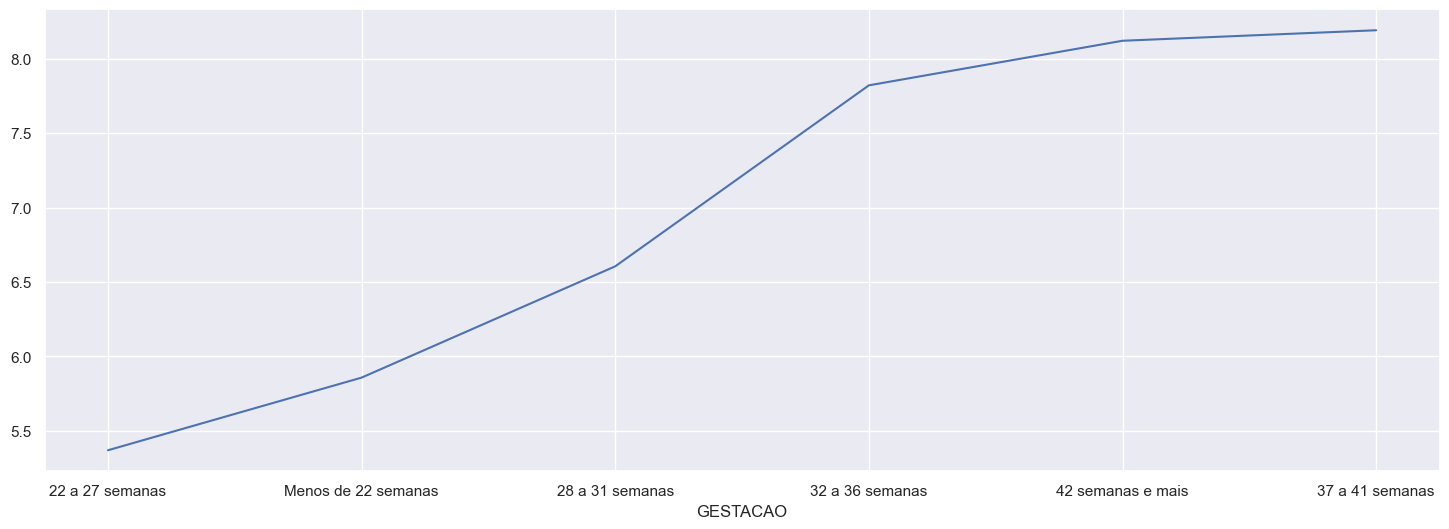

In [22]:
sinasc.groupby("GESTACAO")["APGAR1"].mean().sort_values().plot(figsize=(18,6))

<Axes: xlabel='GESTACAO'>

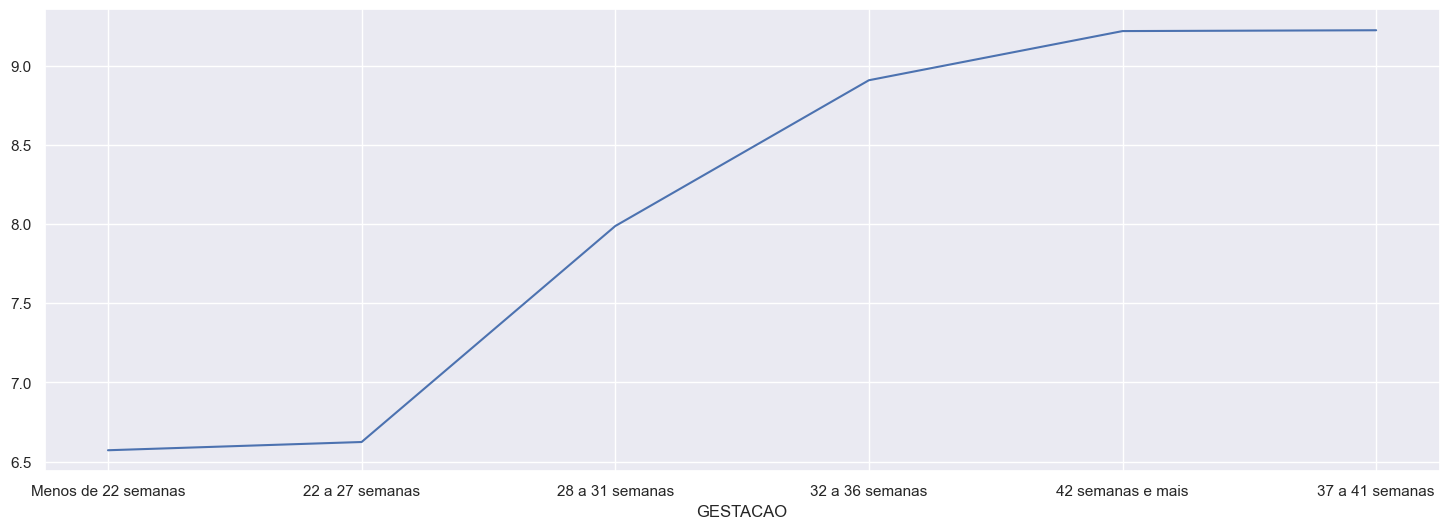

In [23]:
sinasc.groupby("GESTACAO")["APGAR5"].mean().sort_values().plot(figsize=(18,6))